### Laboratorio 9
#### Visualización de Datos
1. Javier Mombiela 20067
2. Jose Hernandez 20053
3. Pablo Gonzalez 20362

### Historia sobre el LULUFC

"Food's Share of Total Emissions" es  la proporción de emisiones de gases de efecto invernadero atribuibles a la producción, distribución, y consumo de alimentos, incluyendo los cambios en el uso de la tierra, la silvicultura y la agricultura (LULUCF, por sus siglas en inglés: Land Use, Land-Use Change, and Forestry).

El sector de alimentos desencadena una cantidad significativa de emisiones de gases de efecto invernadero debido a varias razones:

1. Producción agrícola: Las prácticas agrícolas, como el uso de fertilizantes, el manejo del ganado y la maquinaria agrícola, contribuyen a las emisiones de gases de efecto invernadero, principalmente metano y óxido nitroso.

2. Deforestación y cambios en el uso de la tierra: La expansión de la agricultura y la deforestación para dar paso a cultivos o pastizales contribuyen a las emisiones de carbono al modificar el uso del suelo.

3. Procesamiento, transporte y desperdicio de alimentos: La producción, distribución y eliminación de alimentos generan emisiones, ya sea a través del transporte o el desperdicio.

La importancia de comprender y abordar estas emisiones radica en su significativo impacto en el cambio climático. Los países y organizaciones están trabajando para reducir la huella de carbono del sector de alimentos a través de diversas estrategias:

1. Prácticas agrícolas sostenibles: Promover técnicas agrícolas más eficientes y sostenibles, como la agricultura regenerativa, la agroecología y el uso de tecnologías que reduzcan el uso de químicos y emisiones.

2. Cambio en la dieta: Fomentar dietas más saludables y sostenibles, que incluyan menos carne y productos de origen animal, y una mayor ingesta de alimentos de origen vegetal.

3. Reducción del desperdicio de alimentos: Implementar estrategias para reducir el desperdicio de alimentos en toda la cadena de suministro, desde la producción hasta el consumo.

4. Políticas y acuerdos internacionales: Establecer políticas y acuerdos para abordar las emisiones del sector alimentario a nivel nacional e internacional, como los compromisos del Acuerdo de París y otras iniciativas climáticas.

La importancia de estas acciones radica en la necesidad de mitigar el cambio climático, preservar los recursos naturales y garantizar la seguridad alimentaria a largo plazo. Reducir las emisiones del sector de alimentos es crucial para lograr los objetivos de sostenibilidad y mitigación del cambio climático a nivel mundial.

### Importar librerias

In [35]:
import geopandas as gpd
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, HoverTool
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry
import country_converter as coco
import random

### Cargar la data

In [2]:
df = pd.read_csv('./data/FoodShareEmissions.csv')

### Eliminar columnas vacias

In [3]:
df = df.dropna()
df = df.rename(columns={'Entity':'Country',"Food's share of total emissions (incl. LULUFC)":'LULUFC'})


In [4]:
df

,Country,Code,Year,LULUFC
0,Afghanistan,AFG,1990,78.558522
1,Afghanistan,AFG,1991,79.335651
2,Afghanistan,AFG,1992,84.268804
3,Afghanistan,AFG,1993,85.247941
4,Afghanistan,AFG,1994,86.897834
...,...,...,...,...
5767,Zimbabwe,ZWE,2011,80.391380
5768,Zimbabwe,ZWE,2012,79.733619
5769,Zimbabwe,ZWE,2013,79.451646
5770,Zimbabwe,ZWE,2014,78.125762


In [5]:
df.describe()

,Year,LULUFC
count,5694.000000,5694.000000
mean,2002.500000,114.778005
std,7.500659,4175.904459
min,1990.000000,-2724.699103
25%,1996.000000,22.066111
50%,2002.500000,45.437111
75%,2009.000000,84.912171
max,2015.000000,309631.969600


### Boxplot para la variable LULUFC

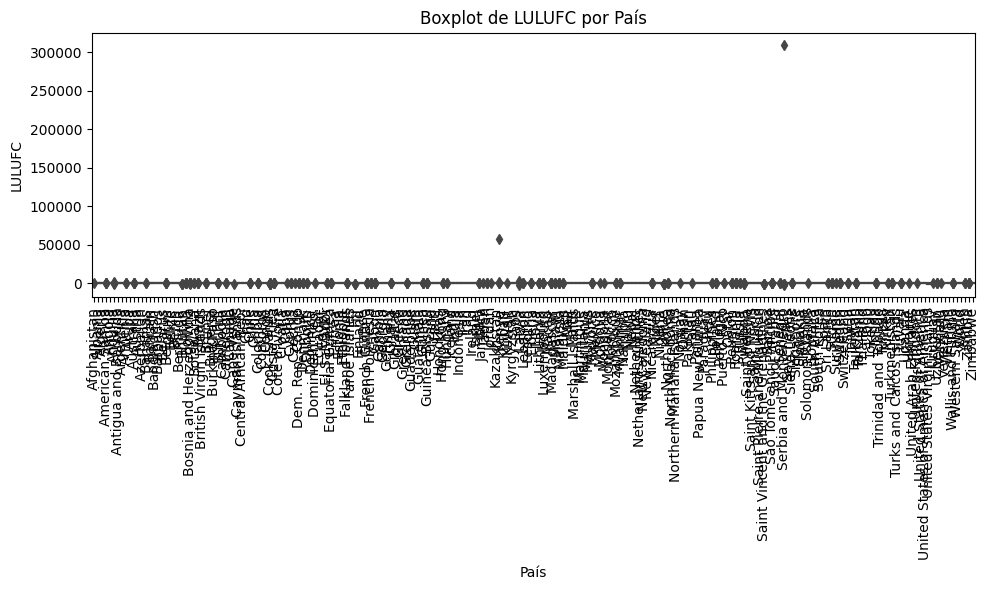

In [6]:
# Crear el boxplot utilizando seaborn
plt.figure(figsize=(10, 6))  # Establecer el tamaño del gráfico

sns.boxplot(x='Country', y='LULUFC', data=df)
plt.xlabel('País')
plt.ylabel('LULUFC')
plt.title('Boxplot de LULUFC por País')

plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mayor legibilidad

plt.tight_layout()
plt.show()

Como se puede visualizar en el boxplot existenn putos atipicos los cuales se tendran que eliminae para obtener resultados satisfactorios

### Identificar los puntos atipicos

In [7]:
# Calcular estadísticas descriptivas
Q1 = df['LULUFC'].quantile(0.25)
Q3 = df['LULUFC'].quantile(0.75)
IQR = Q3 - Q1

# Calcular límites para identificar outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identificar outliers
outliers = df[(df['LULUFC'] < lower_limit) | (df['LULUFC'] > upper_limit)]['LULUFC']

# Mostrar valores atípicos en una lista
outliers_list = outliers.tolist()
print("Valores atípicos (outliers):", outliers_list)

Valores atípicos (outliers): [-126.9831153, 596.7314112, 321.1368856, 1895.018957, -900.7482374, 263.2219468, 227.3663172, -78.95270434, -90.87837289, -81.90643308, -206.8928872, -515.636731, -111.0735671, -413.7029064, -74.42224819, -77.85573691, -189.2286092, -176.3913168, -289.073731, 192.3697828, 200.4903567, 187.7414416, -116.5797789, -154.5449842, -159.2942717, -127.4420999, -194.7807811, -131.215746, -174.9898814, -197.938468, -226.4191386, -505.4459934, 492.3620179, 332.8244823, 232.4697605, 462.4354244, 221.9958602, 242.3531132, -497.8773394, 214.5306007, 220.0554074, -274.1991157, -384.8700633, -766.7311117, -913.598547, 686.4286012, -1280.235418, 184.106419, 735.8346977, 762.5306823, 639.4737265, 621.5088502, 666.0951783, 214.425079, 306.9654239, 243.6350832, 218.1988817, 276.5729244, 270.6595446, 271.5407674, 207.1346838, 183.7560788, 184.1404729, 181.1088185, 265.2544065, 185.0283283, 187.259835, 340.7270168, 450.1353761, 423.066356, 341.9632645, 504.152156, 415.4126512, 3

### Eliminar los puntos atipicos

In [8]:
# Filtrar los datos para excluir outliers
df = df[(df['LULUFC'] >= lower_limit) & (df['LULUFC'] <= upper_limit)]

In [9]:
df.describe()

,Year,LULUFC
count,5485.000000,5485.000000
mean,2002.531814,52.868421
std,7.496044,35.331244
min,1990.000000,-72.196524
25%,1996.000000,22.383670
50%,2003.000000,44.787261
75%,2009.000000,83.344552
max,2015.000000,177.936632


### Países con una mayor proporción y cómo ha evolucionado en los últimos años

In [10]:
mean_emissions = df.groupby('Country')['LULUFC'].mean()
top_5_countries = mean_emissions.nlargest(5).index.tolist()

# Filtra los datos para los 10 países con la mayor proporción de emisiones
top_countries_data = df[df['Country'].isin(top_5_countries)]

# Grafica la evolución de la proporción de emisiones en los últimos años para los 10 paíse

In [11]:
top_5_countries

['Wallis and Futuna', 'Uruguay', 'Botswana', 'Niue', 'Tuvalu']

In [12]:
top_countries_data

,Country,Code,Year,LULUFC
650,Botswana,BWA,1990,122.677986
651,Botswana,BWA,1991,123.360805
652,Botswana,BWA,1992,122.335356
653,Botswana,BWA,1993,122.873845
654,Botswana,BWA,1994,123.254861
...,...,...,...,...
5637,Wallis and Futuna,WLF,2011,86.432183
5638,Wallis and Futuna,WLF,2012,86.275684
5639,Wallis and Futuna,WLF,2013,86.137568
5640,Wallis and Futuna,WLF,2014,85.987337


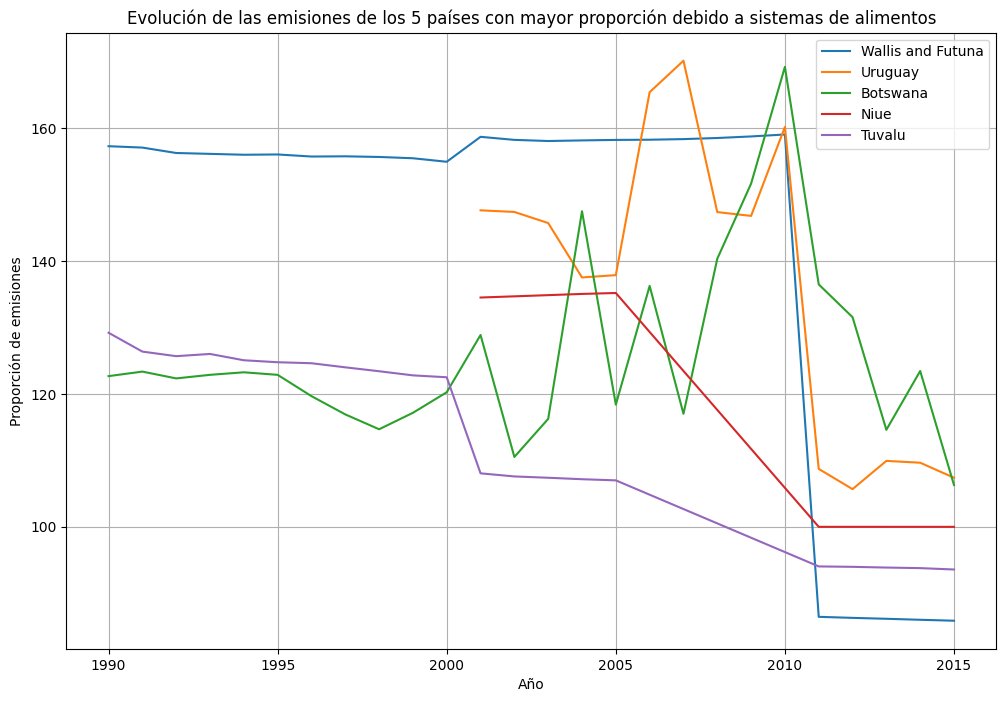

In [13]:
data = []
plt.figure(figsize=(12, 8))
for country in top_5_countries:
    datatemp = []
    country_data = top_countries_data[top_countries_data['Country'] == country]
    plt.plot(country_data['Year'], country_data["LULUFC"], label=country)
    data.append(country_data)
    

plt.title('Evolución de las emisiones de los 5 países con mayor proporción debido a sistemas de alimentos')
plt.xlabel('Año')
plt.ylabel('Proporción de emisiones')
plt.legend()
plt.grid(True)
plt.show()

### Wallis and Futuna
Wallis and Futuna muestran una tendencia consistentemente decreciente en sus métricas de Uso del Suelo y Cambio del Uso del Suelo y Silvicultura (LLUFC) desde 1990 hasta 2015, con aumentos intermitentes a principios de la década de 2000. La disminución gradual en los valores de LULUFC podría indicar esfuerzos de conservación del medio ambiente o un cambio en las prácticas de gestión de la tierra orientadas hacia la sostenibilidad. La caída repentina después de 2010 podría sugerir un cambio en las metodologías de informe, políticas de uso de la tierra alteradas o una falta de continuidad en los datos.

### Uruguay
Uruguay experimentó patrones fluctuantes en sus métricas de LULUFC a lo largo de los años, mostrando una tendencia general a la baja con picos ocasionales. La caída sustancial en 2004 seguida de un aumento significativo en 2006 implica posibles cambios en políticas o prácticas de uso de la tierra. El declive posterior a 2010 podría reflejar un aumento en la conciencia ambiental, regulaciones más estrictas o iniciativas de reforestación y secuestro de carbono para contrarrestar los cambios en el uso de la tierra.

### Botswana
Los datos de LULUFC de Botswana fluctúan notablemente de 1990 a 2015, mostrando tendencias tanto al alza como a la baja. El aumento sustancial en 2004 podría atribuirse a cambios en prácticas de uso de la tierra, posiblemente implicando deforestación o expansión agrícola. La disminución posterior podría señalar esfuerzos de reforestación, cambios en políticas o cambios económicos que afectan las prácticas y la gestión de la tierra.

### Niue
Niue muestra un valor constante de LULUFC durante la mayor parte de los años, con una ligera disminución después de 2010. Los valores estables indican una posible estabilidad en las prácticas de uso y gestión de la tierra. La ligera disminución podría significar un enfoque en políticas sostenibles de uso de la tierra o podría atribuirse a métodos alterados de reporte de datos.

### Tuvalu
El LULUFC de Tuvalu muestra una tendencia a la baja constante a lo largo de los años, señalando posibles iniciativas hacia prácticas sostenibles de gestión de la tierra o esfuerzos de conservación del medio ambiente. La disminución gradual podría reflejar un esfuerzo consciente por mantener un equilibrio ecológico o podría ser el resultado de la limitada área de tierra y regulaciones más estrictas en el uso y desarrollo de la tierra.

Las tendencias observadas en los datos de LULUFC de estos países sugieren una serie de factores potenciales, que incluyen políticas ambientales, cambios económicos, esfuerzos de conservación y alteraciones en las prácticas de gestión de la tierra, que influyen en los valores informados a lo largo de los años.

### ¿Cómo se comparan las diferentes regiones del mundo?

Se crea la columna de continente en el dataframe

In [14]:
countries = df['Code'].unique()

In [15]:
country_converter = coco.CountryConverter()
country_to_continent = country_converter.convert(names=countries, to='continent', not_found=None)

ANT not found in ISO3
OWID_SRM not found in regex
OWID_WRL not found in regex


In [16]:
country_continent_dict = dict(zip(countries, country_to_continent))

In [17]:
df['Continente'] = df['Code'].map(country_continent_dict)

C:\Users\pablo\AppData\Local\Temp\ipykernel_15980\3972363118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Continente'] = df['Code'].map(country_continent_dict)


In [19]:
df

,Country,Code,Year,LULUFC,Continente
0,Afghanistan,AFG,1990,78.558522,Asia
1,Afghanistan,AFG,1991,79.335651,Asia
2,Afghanistan,AFG,1992,84.268804,Asia
3,Afghanistan,AFG,1993,85.247941,Asia
4,Afghanistan,AFG,1994,86.897834,Asia
...,...,...,...,...,...
5767,Zimbabwe,ZWE,2011,80.391380,Africa
5768,Zimbabwe,ZWE,2012,79.733619,Africa
5769,Zimbabwe,ZWE,2013,79.451646,Africa
5770,Zimbabwe,ZWE,2014,78.125762,Africa


In [25]:
df_grouped = df.groupby(['Continente', 'Year'])['LULUFC'].mean().unstack()
df_grouped = df_grouped.drop(['OWID_SRM', 'OWID_WRL', 'ANT'])



In [27]:
df_grouped

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Continente,,,,,,,,,,,,,,,,,,,,,
Africa,72.487923,74.448688,74.405547,74.141936,72.783244,72.380689,71.503033,71.086683,71.438374,70.959528,...,74.577008,73.506519,73.347633,75.256642,74.623644,68.772212,68.582530,67.766582,67.509548,66.988275
America,61.063337,61.521105,57.884797,60.611836,61.891789,61.254592,65.432091,61.078660,61.339416,61.996348,...,51.158340,50.828056,50.205520,50.233614,50.109382,49.769981,47.531811,46.963367,46.934428,46.777777
Asia,38.682009,38.266229,38.681721,38.771229,39.181671,38.781999,38.797558,38.487369,38.759312,38.308725,...,35.380211,35.002351,34.515438,34.695762,34.390304,35.644906,35.169369,35.245655,35.170294,32.923733
Europe,33.192385,33.885537,36.778584,38.497194,35.607338,35.746773,35.104106,36.804416,35.776850,36.208969,...,35.056034,35.025063,35.323066,36.102002,35.272593,32.941533,33.418509,31.242356,31.939536,32.095755
Oceania,70.966833,71.048382,71.218780,71.320516,71.958021,71.820315,71.163710,71.575455,70.228388,70.555106,...,67.021971,67.624521,66.388557,67.409076,66.382739,66.274243,64.798664,66.354747,68.496522,69.291335


#### Comparación de LULUFC por Regiones y tiempo

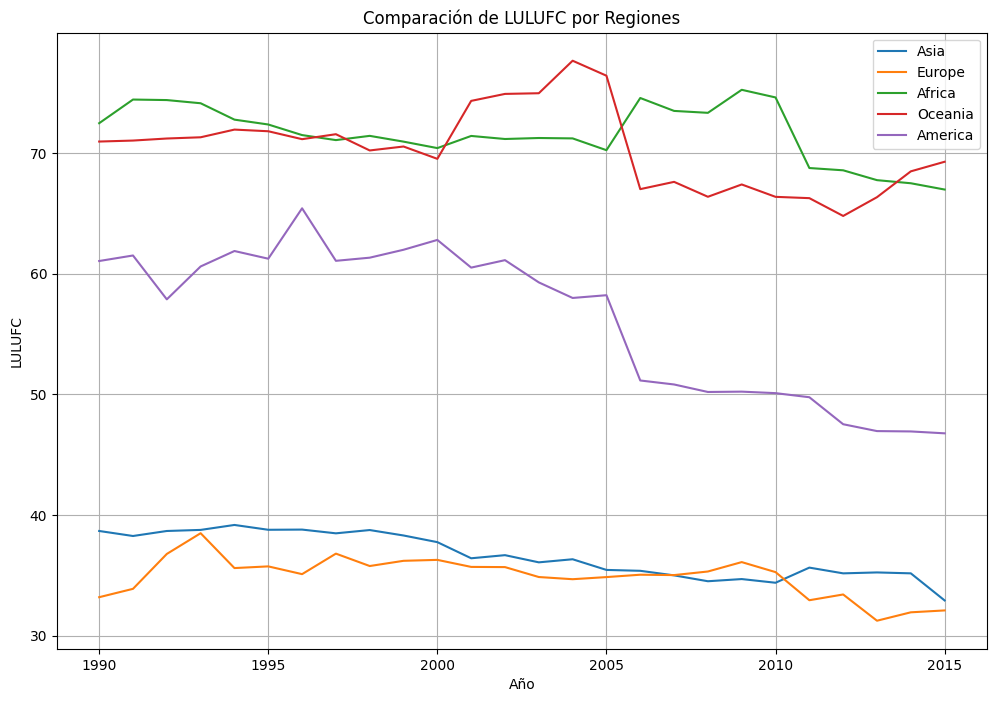

In [29]:
plt.figure(figsize=(12, 8))

excluded_continents = ['OWID_SRM', 'OWID_WRL', 'ANT']

for continent in df['Continente'].unique():
    if continent not in excluded_continents:
        if continent in df_grouped.index:
            plt.plot(df_grouped.loc[continent], label=continent)

plt.title('Comparación de LULUFC por Regiones')
plt.xlabel('Año')
plt.ylabel('LULUFC')
plt.legend()
plt.grid(True)
plt.show()


#### África
África muestra una tendencia variable en sus métricas de Uso del Suelo y Cambio del Uso del Suelo y Silvicultura (LLUFC) desde 1990 hasta 2015. La tendencia general indica una fluctuación, con algunos picos y caídas significativas. Esto podría deberse a factores diversos, como cambios en políticas de uso de la tierra, la presión sobre los recursos naturales, esfuerzos de conservación o variaciones en la actividad económica y la urbanización.

#### América
América experimenta una tendencia mixta en sus valores de LULUFC a lo largo de los años. Muestra una disminución general desde 1990 hasta 2005, seguida de un período de fluctuaciones, sugiriendo cambios en las políticas de desarrollo, regulaciones ambientales o adaptaciones económicas en los países que componen el continente.

#### Asia
Asia demuestra una tendencia generalmente decreciente en sus métricas de LULUFC desde 1990 hasta 2015. Estos cambios podrían atribuirse a factores como la urbanización acelerada, cambios en la agricultura, la implementación de políticas ambientales o esfuerzos por mejorar la gestión sostenible de los recursos naturales.

#### Europa
Europa muestra una tendencia relativamente estable desde 1990 hasta 2005, seguida de una ligera disminución hacia 2015. Esta tendencia puede reflejar esfuerzos para mejorar la eficiencia en el uso del suelo, la implementación de políticas ambientales más estrictas o cambios en la actividad industrial y económica.

#### Oceanía
Oceanía exhibe una tendencia fluctuante en sus valores de LULUFC, con un aumento significativo hacia 2005, seguido de un período de altibajos. Esta variabilidad podría estar relacionada con cambios en la gestión de los recursos naturales, regulaciones ambientales o fluctuaciones en la actividad económica de los países de la región.

### Comparación de LULUFC pormedio por Regiones

In [52]:
excluded_continents = ['OWID_SRM', 'OWID_WRL', 'ANT']

# Filtrar el DataFrame original para excluir los continentes no deseados
filtered_df = df[~df['Continente'].isin(excluded_continents)]

# Calcular el promedio de LULUFC por continente
df_mean = filtered_df.groupby('Continente')['LULUFC'].mean().sort_values()
df_mean


Continente
Europe     34.931652
Asia       36.671357
America    56.299813
Oceania    70.438771
Africa     71.635617
Name: LULUFC, dtype: float64

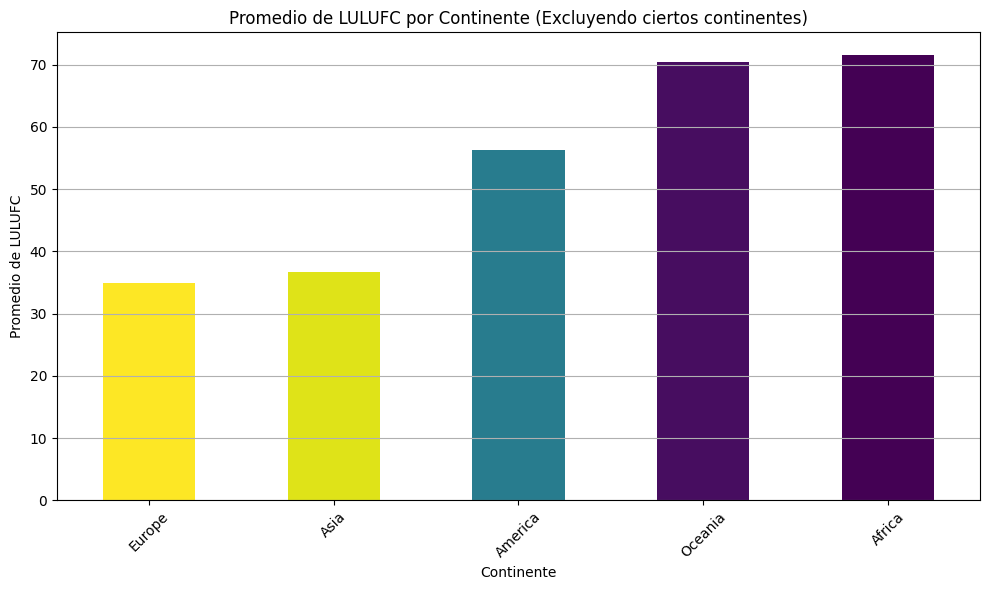

In [51]:
# Colores para las barras
colors = plt.cm.viridis_r((df_mean - df_mean.min()) / (df_mean.max() - df_mean.min()))

# Gráfico de barras con colores distintos para cada barra
plt.figure(figsize=(10, 6))
df_mean.plot(kind='bar', color=colors)
plt.title('Promedio de LULUFC por Continente (Excluyendo ciertos continentes)')
plt.xlabel('Continente')
plt.ylabel('Promedio de LULUFC')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Los resultados muestran el promedio del Food's share of total emissions (incluyendo Land Use and Land-Use Change and Forestry, LULUFC) para cada continente:

1. Europa (34.93): Europa tiene un promedio relativamente bajo en comparación con otros continentes. Esto podría atribuirse a su enfoque en prácticas agrícolas más sostenibles, un mayor uso de tecnologías menos intensivas en emisiones, y políticas estrictas en cuanto a la gestión del uso del suelo.

2. Asia (36.67): A pesar de ser un continente con una gran diversidad de economías y prácticas agrícolas, su promedio se sitúa en el rango medio. Esto puede ser resultado de un rápido crecimiento económico en ciertas regiones, lo que conlleva a un aumento de emisiones provenientes de la agricultura y actividades de uso del suelo.

3. América (56.30): América tiene un promedio significativamente más alto en comparación con otros continentes. Esto podría ser el resultado de prácticas agrícolas intensivas, uso extensivo de tierras para la agricultura, y la producción a gran escala de alimentos.

4. Oceanía (70.44): Este continente muestra el segundo promedio más alto, indicando una contribución significativa de las prácticas agrícolas y del uso de la tierra en las emisiones totales. Podría ser atribuible a la agricultura extensiva, la ganadería y la gestión del suelo.

5. África (71.64): África tiene el promedio más alto, lo que puede reflejar un menor desarrollo en las políticas de gestión de emisiones, menor adopción de prácticas agrícolas sostenibles y una dependencia significativa en la agricultura tradicional.

Comparativamente, se observa que Europa y Asia tienen promedios relativamente bajos en comparación con América, Oceanía y África. Esto podría relacionarse con una mayor implementación de prácticas agrícolas sostenibles, regulaciones estrictas o la adopción de tecnologías más limpias en los primeros dos continentes. En contraste, América, Oceanía y África muestran promedios más altos, lo que sugiere la necesidad de implementar estrategias más sólidas para reducir las emisiones en la agricultura y la gestión del uso del suelo.

### ¿Cómo está la situación en Guatemala, comparada al mundo?

In [65]:
# 1. Calcular el promedio mundial de LUFC excluyendo a Guatemala
global_mean = df[df['Country'] != 'Guatemala']['LULUFC'].mean()

# 2. Obtener el valor promedio del LUFC para Guatemala
lulufc_guatemala = df[df['Country'] == 'Guatemala']['LULUFC'].mean()

### Grafica de tedencia del LULUFC Guatemala vs la media global

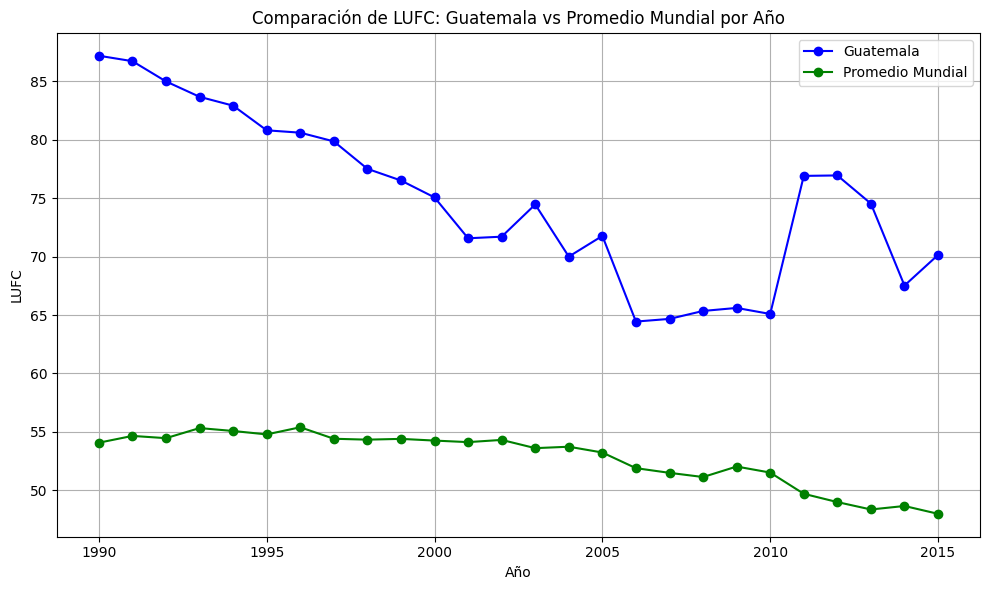

In [80]:


# Filtrar datos de Guatemala y cálculo del promedio mundial por año
df_guatemala = df[df['Country'] == 'Guatemala']
global_mean_by_year = df[df['Country'] != 'Guatemala'].groupby('Year')['LULUFC'].mean()

plt.figure(figsize=(10, 6))
plt.plot(df_guatemala['Year'], df_guatemala['LULUFC'], marker='o', label='Guatemala', color='blue')

# Gráfico para el promedio mundial
plt.plot(global_mean_by_year.index, global_mean_by_year.values, marker='o', label='Promedio Mundial', color='green')

plt.title('Comparación de LUFC: Guatemala vs Promedio Mundial por Año')
plt.xlabel('Año')
plt.ylabel('LUFC')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


1. Guatemala:
La tendencia de Guatemala en LULUFC varía significativamente a lo largo de los años. Comienza en 1990 con un valor alto de 87.20 y disminuye gradualmente hasta alcanzar 70.15 en 2015, con algunos picos y valles en el medio. En general, se observa una disminución en las emisiones derivadas de la gestión del uso del suelo y cambios en la cobertura forestal a lo largo del tiempo, aunque con cierta variabilidad.

2. Promedio Mundial:
El promedio mundial también muestra una tendencia a la baja, empezando en 1990 con 54.08 y decreciendo hasta 47.99 en 2015. Esta tendencia global refleja una disminución general en las emisiones de LULUFC en todo el mundo.

Comparando Guatemala con el promedio mundial, se evidencia que el país comenzó con niveles significativamente más altos de LULUFC en 1990 en comparación con el promedio global. A lo largo de los años, Guatemala muestra una disminución similar a la tendencia mundial, aunque su tasa de reducción parece ser más lenta en comparación con el descenso global.

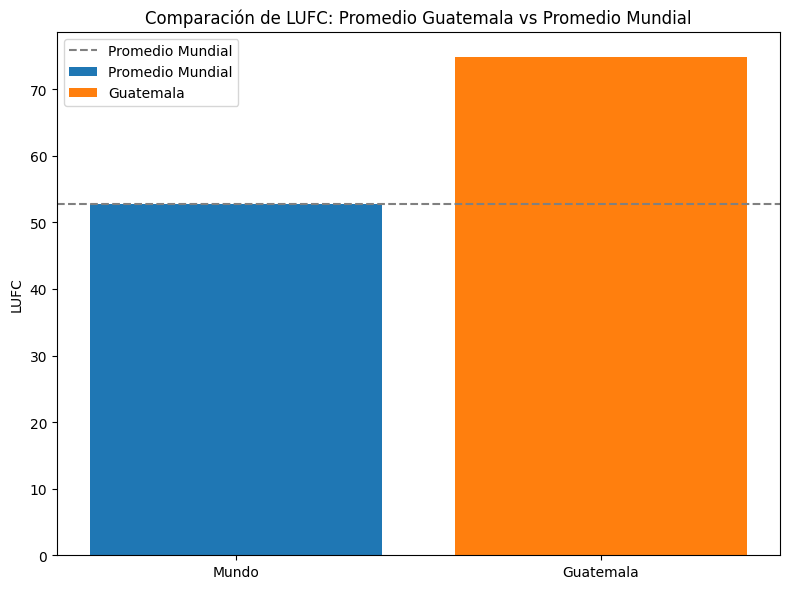

In [81]:
# 1. Calcular el promedio mundial de LUFC excluyendo a Guatemala
global_mean = df[df['Country'] != 'Guatemala']['LULUFC'].mean()

# 2. Obtener el valor promedio del LUFC para Guatemala
lulufc_guatemala = df[df['Country'] == 'Guatemala']['LULUFC'].mean()
# 3. Crear un gráfico de comparación con colores más atractivos
plt.figure(figsize=(8, 6))

# Barra para el promedio mundial
plt.bar('Mundo', global_mean, color='#1f77b4', label='Promedio Mundial')

# Barra para Guatemala
plt.bar('Guatemala', lulufc_guatemala, color='#ff7f0e', label='Guatemala')

# Línea para el promedio mundial
plt.axhline(global_mean, color='gray', linestyle='--', label='Promedio Mundial')

plt.title('Comparación de LUFC: Promedio Guatemala vs Promedio Mundial')
plt.ylabel('LUFC')
plt.legend()
plt.tight_layout()
plt.show()

La diferencia entre la media global del Food's share of total emissions (incluyendo LULUFC) y la de Guatemala sugiere disparidades significativas en las emisiones asociadas con la agricultura y la gestión del uso de la tierra. Varios factores podrían explicar por qué la media de Guatemala es mayor que la media global, a pesar de la tendencia global a tener un promedio menor:

1. Prácticas agrícolas tradicionales:
Guatemala, al ser un país con una estructura agrícola variada y en algunos casos dependiente de métodos agrícolas más tradicionales, puede estar experimentando una mayor proporción de emisiones asociadas con la producción de alimentos. Si las prácticas agrícolas en Guatemala son más intensivas en emisiones que las prácticas promedio a nivel mundial, esto podría elevar su media.

2. Cambio en el uso de la tierra:
La conversión de tierras forestales o naturales a tierras agrícolas, particularmente en países en vías de desarrollo, puede generar un aumento en las emisiones asociadas con el cambio en el uso de la tierra y la deforestación. Guatemala podría estar experimentando un cambio significativo en el uso de la tierra, lo que aumentaría su contribución a estas emisiones.

3. Factores socioeconómicos:
La distribución desigual de la riqueza, la tecnología y la infraestructura en la agricultura guatemalteca en comparación con regiones más desarrolladas puede desempeñar un papel importante. La falta de acceso a tecnologías más limpias o de métodos agrícolas sostenibles puede contribuir a un mayor nivel de emisiones en Guatemala en comparación con la media mundial.

4. Regulaciones y políticas medioambientales:
Las políticas nacionales pueden variar en su enfoque y aplicación. Si Guatemala tiene regulaciones menos estrictas o prácticas menos enfocadas en la mitigación de emisiones en comparación con otras regiones del mundo, esto podría aumentar la contribución de emisiones al sector de uso de la tierra y la agricultura.

En resumen, la diferencia en las medias entre Guatemala y la media global puede ser el resultado de una combinación de prácticas agrícolas, cambios en el uso de la tierra, factores socioeconómicos y diferencias en las políticas y regulaciones ambientales. Resolver estas disparidades requerirá un enfoque integral que aborde los desafíos específicos que enfrenta Guatemala en términos de su agricultura y gestión del uso de la tierra.

### ¿Cómo está la situación en Guatemala, comparada a América Latina?

In [85]:
paises_latinoamerica = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'Dominican Rep.', 'Ecuador', 'El Salvador', 'Guatemala', 'Honduras', 'Mexico', 'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Puerto Rico', 'Uruguay', 'Venezuela']


In [86]:
def es_latinoamerica(pais):
    return 'Si' if pais in paises_latinoamerica else 'No'

In [87]:
df['EsLatinoamerica'] = df['Country'].apply(es_latinoamerica)


C:\Users\pablo\AppData\Local\Temp\ipykernel_15980\3191280691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EsLatinoamerica'] = df['Country'].apply(es_latinoamerica)


In [101]:
df_latinoamerica = df[(df['Country'].isin(paises_latinoamerica)) & (df['Country'] != 'Guatemala')]
mean_lulufc_latam = df_latinoamerica.groupby('Year')['LULUFC'].mean()

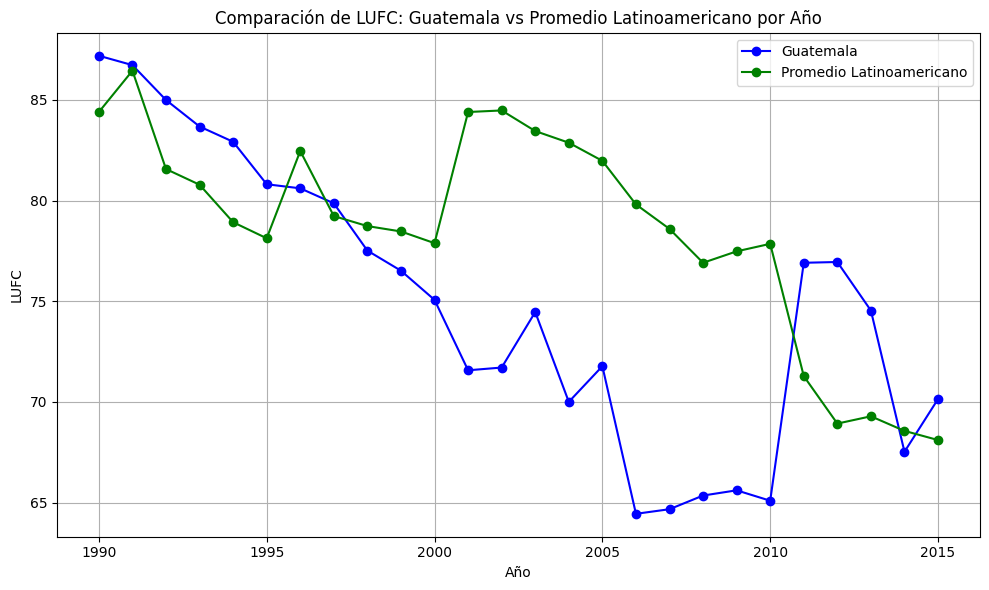

In [103]:
plt.figure(figsize=(10, 6))
plt.plot(df_guatemala['Year'], df_guatemala['LULUFC'], marker='o', label='Guatemala', color='blue')

# Gráfico para el promedio mundial
plt.plot(mean_lulufc_latam.index, mean_lulufc_latam.values, marker='o', label='Promedio Latinoamericano', color='green')

plt.title('Comparación de LUFC: Guatemala vs Promedio Latinoamericano por Año')
plt.xlabel('Año')
plt.ylabel('LUFC')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [94]:
df_latinoamerica

,Country,Code,Year,LULUFC,Continente,EsLatinoamerica
182,Argentina,ARG,1990,81.231668,America,Si
183,Argentina,ARG,1991,81.698589,America,Si
184,Argentina,ARG,1992,81.351524,America,Si
185,Argentina,ARG,1993,80.320201,America,Si
186,Argentina,ARG,1994,78.288069,America,Si
...,...,...,...,...,...,...
5585,Venezuela,VEN,2011,43.143253,America,Si
5586,Venezuela,VEN,2012,42.123759,America,Si
5587,Venezuela,VEN,2013,46.705585,America,Si
5588,Venezuela,VEN,2014,44.637103,America,Si


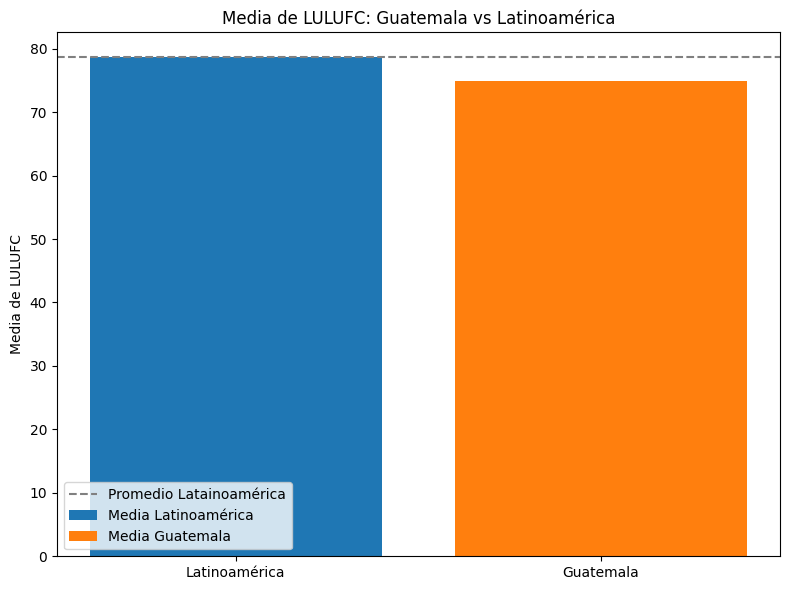

In [108]:
mean_lulufc_latam = df_latinoamerica['LULUFC'].mean()

# Paso 2: Calcular la media de LULUFC para Guatemala
mean_lulufc_guatemala = df[df['Country'] == 'Guatemala']['LULUFC'].mean()

# Paso 3: Crear un gráfico de barras para comparar las medias
plt.figure(figsize=(8, 6))

# Barra para la media de países de Latinoamérica (excluyendo Guatemala)
plt.bar('Latinoamérica', mean_lulufc_latam, color='#1f77b4', label='Media Latinoamérica')

# Barra para la media de Guatemala
plt.bar('Guatemala', mean_lulufc_guatemala, color='#ff7f0e', label='Media Guatemala')

plt.axhline(mean_lulufc_latam, color='gray', linestyle='--', label='Promedio Latainoamérica')

plt.title('Media de LULUFC: Guatemala vs Latinoamérica')
plt.ylabel('Media de LULUFC')
plt.legend()
plt.tight_layout()
plt.show()

La diferencia entre la media de Food's share of total emissions (incluyendo LULUFC) para América Latina (78.64) y la de Guatemala (74.87) sugiere similitudes y diferencias en las emisiones asociadas con la producción de alimentos y la gestión del uso de la tierra en la región y en Guatemala específicamente.

##### Similitudes:

1. Contexto regional
Ambos valores son relativamente similares, lo que podría indicar que Guatemala se encuentra alineada con la media de la región en términos de emisiones vinculadas a la agricultura y la gestión del uso de la tierra.
2. Factores comunes: 
Puede haber aspectos compartidos entre el país y la región que generen resultados similares, como prácticas agrícolas, sistemas de producción o condiciones climáticas que se reflejan en los niveles de emisiones.
##### Diferencias:

1. Variaciones regionales 
A pesar de la similitud general, la ligera diferencia podría atribuirse a variaciones en las prácticas agrícolas o enfoques de gestión del suelo específicos de Guatemala en comparación con otros países de América Latina.
1. Políticas y enfoques nacionales 
Las regulaciones o enfoques específicos de Guatemala podrían estar influyendo en las emisiones de manera distinta a otros países de la región.

Estas diferencias y similitudes podrían estar asociadas con la implementación de políticas y prácticas de gestión del suelo y la agricultura, así como las particularidades del panorama agrícola y de uso de la tierra en Guatemala en comparación con otros países de América Latina. A pesar de que Guatemala está en línea con la tendencia de la región, existen matices que indican que el país tiene particularidades propias en sus emisiones, aunque sean relativamente cercanas al promedio regional.

### Grafica interactiva con los valores LULUFC por pais

In [18]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
average_by_country = df.groupby('Country')["LULUFC"].mean().reset_index()
world['Average Emissions'] = world['name'].map(average_by_country.set_index('Country')["LULUFC"])
geosource = GeoJSONDataSource(geojson=world.to_json())

# Crear la figura
p = figure(title="World Map", toolbar_location="above", width=800, height=400)
p.patches('xs', 'ys', source=geosource, line_color='white', line_width=0.5)

# Agregar tooltips al pasar el cursor
hover = HoverTool(tooltips=[("Country", "@name"), ("Avg Food Emissions", "@{Average Emissions}")])
p.add_tools(hover)


output_file("world_map.html")
show(p)

C:\Users\pablo\AppData\Local\Temp\ipykernel_15980\527537418.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


#### Reflexión y Camino a Seguir

##### 1. ¿Qué experiencias individuales han tenido los miembros de su grupo?

1. Pablo Gonzalez: En mi caso con respecto a la visualización de datos si he tenido una buena experiencia ya que esta hace que podamos ver la data de una manera más concisa y fácil de explicar también puedo mencionar que he tenido una buena experiencia con la librería de matplotlib pero esta nueva librería de bokeh me sorprendió mucho.
2. Javier Mombiela: En mi caso he tenido una buena experiencia con este laboratorio ya que he aprendido de una mejor manera cómo es que se pueden presentar los datos de una manera inteligente y como es que se puede llevar una narrativa de los mismos respondiendo a preguntas claves sobre el tema que se está tratando.
3. Jose Hernandez: En mi caso mi experiencia ha sido buena ya que he aprendido más acerca de la visualización de datos y cómo es que se hacen cierto tipo de gráficas y cuándo es buen momento para poder usar cada gráfica por lo que considero que este lab ha sido de gran ayuda para poder comprender esta parte.
4. Grupal: En general hemos aprendido mucho acerca de como hacer graficas de manera ordenada y efectiva llevando una narrativa de la misma y respondiendo a preguntas clave que pueden ser de gran ayuda para comprender un conjunto de datos y también hemos aprendido que las visualizaciones explican de una mejor manera los conjuntos de datos y para gente que no tiene mucho contexto esto puede ayudar de gran manera a entenderlos, también hemos tenido como experiencia la liberia de bokeh la cual nos sorprendió mucho al generar gráficos interactivos en html y esperamos poder usar esta librería en un futuro para presentar gráficos de calidad.

#### 2. Comenten sobre la importancia de la ética en la visualización de datos, evitando visualizaciones engañosas o que lleven a interpretaciones erróneas. Pueden proporcionar casos notorios

La ética en la visualización de datos es fundamental para garantizar la precisión, la transparencia y la honestidad en la presentación de información. Las representaciones visuales de datos pueden ser poderosas pero también pueden ser manipuladas para presentar información de manera engañosa o sesgada. La ética en este contexto implica la responsabilidad de los diseñadores y presentadores de datos para evitar sesgos, manipulaciones o representaciones que puedan inducir a interpretaciones erróneas. La visualización ética de datos busca garantizar que la presentación de la información sea precisa, clara y no lleve a conclusiones incorrectas. Esto implica:

1. Precisión y veracidad: Los datos deben representarse de manera precisa y fiel a la realidad. Cualquier manipulación intencional o selección sesgada de datos puede distorsionar la percepción de la realidad.

2. Contextualización: Es crucial proporcionar un contexto claro que ayude a interpretar los datos correctamente. Sin contexto, los datos pueden malinterpretarse fácilmente.

3. Evitar la manipulación: La selección de escalas, colores, formas y otros elementos visuales puede influir en cómo se perciben los datos. Se deben evitar manipulaciones que exageren o minimicen la importancia de ciertos valores.

#### Caso notorio

Un caso notorio de mala praxis en la visualización de datos fue el gráfico utilizado por Andrew Wakefield en un artículo publicado en 1998 que pretendía establecer un vínculo entre la vacuna contra el sarampión, paperlas y rubéola (MMR) y el autismo. Este gráfico presentaba datos engañosos que sugerían una relación causal entre la vacuna y el autismo. El gráfico, a pesar de ser desacreditado y retirado, tuvo un impacto considerable en la percepción pública y generó un aumento en la reticencia hacia las vacunas.

Además, casos más recientes han mostrado la manipulación de escalas, la omisión selectiva de datos o la representación visual engañosa para respaldar puntos de vista políticos o comerciales. Estos incidentes enfatizan la necesidad de practicar la ética en la visualización de datos para garantizar que la información presentada sea precisa, clara y no conduzca a interpretaciones falsas o erróneas

### Referencias

H. Ritchie, P. Rosado and M. Roser (2022) - "Environmental Impacts of Food Production OurWorldInData.org. Extraido de: 'https://ourworldindata.org/environmental-impacts-of-food' [Online Resource]